In [4]:
## Import Library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Class
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('.', end='')
    
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [cm]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$cm^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
.............

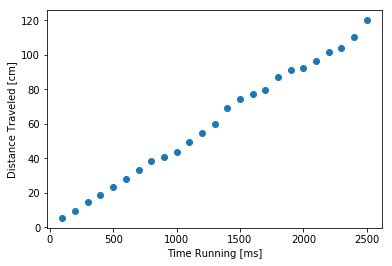

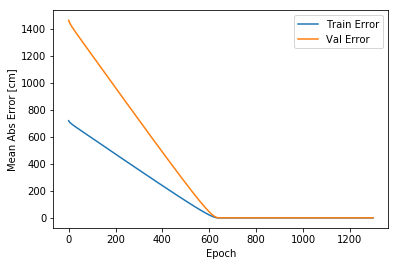

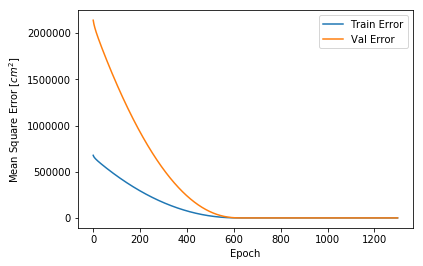


Final Root Mean Square Error on training set:  2.17 cm
Final Root Mean Square Error on validation set:  2.98 cm


In [12]:
tr_vs_d = pd.read_csv('tr_vs_d.csv',delimiter=',')
x = tr_vs_d["Time Running"]
y = tr_vs_d["Distance Traveled"]
plt.scatter(x, y)
plt.xlabel('Time Running [ms]')
plt.ylabel('Distance Traveled [cm]')

## Build Model
model = tf.keras.Sequential([
        tf.layers.Dense(1, activation="linear", input_shape=([1])),
    ])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mean_absolute_error', 'mean_squared_error'])
model.summary()

## Model Learning
EPOCHS = 1300
history = model.fit(
  x, y,
  epochs=EPOCHS, validation_split = 0.05, verbose=0,
  callbacks=[PrintDot()])
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_history(history)
rmse_final = np.sqrt(float(hist['mean_squared_error'].tail(1)))
rmse_val_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on training set: {:5.2f} cm'.format(rmse_final))
print('Final Root Mean Square Error on validation set: {:5.2f} cm'.format(rmse_val_final))

In [13]:
weights = model.get_weights()
weights

[array([[0.04651149]], dtype=float32), array([-0.38715804], dtype=float32)]

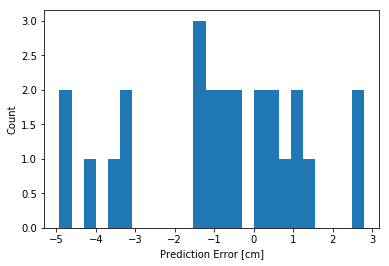

In [16]:
test_predictions = model.predict(x).flatten()
error = test_predictions - y
error
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [cm]")
_ = plt.ylabel("Count")

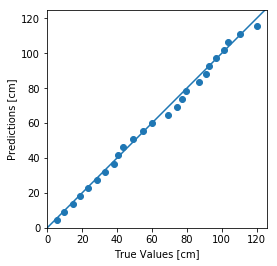

In [17]:
plt.scatter(y, test_predictions)
plt.xlabel('True Values [cm]')
plt.ylabel('Predictions [cm]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 130], [0, 130])

In [1]:
tr_vs_d

NameError: name 'tr_vs_d' is not defined